# 데이터 전처리 - 정규화

+ Feature Scaling에는 표준화(Standardization)과 정규화(Normalization)이 있음
+ 표준화는 데이터의 피처의 평균이 0, 분산이 1인 가우시안 분포를 가진 값으로 변환하는 것을 뜻함
+ 정규화는 개별 데이터를 모두 똑같은 단위로 변경하는 것을 뜻함

> Stamdard Scaler

+ 가우시안 정규분포를 가질 수 있게 데이터를 변환함
+ SVM(Support Vector Machine), 선형회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)은 데이터가 가우시안 분포를 가진다는 가정하에 구현되었기 때문에 정규화는 성능 향상에 중요한 요소임

In [1]:

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
iris = load_iris()
iris_data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_y = pd.DataFrame(data = iris.target)

In [8]:
print('iris mean :\n', iris_data.mean(), '\n')
print('iris var : \n', iris_data.var())

iris mean :
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64 

iris var : 
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [9]:
scaler = StandardScaler()

In [13]:
iris_data_std = pd.DataFrame(scaler.fit_transform(iris_data), columns = iris.feature_names)
print('iris std mean :\n', iris_data_std.mean(), '\n')
print('iris std var : \n', iris_data_std.var())

iris std mean :
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64 

iris std var : 
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


> MinMax Scaler

+ MinMax Scaler는 데이터의 범위를 0부터 1 사이의 값으로 반환함

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
iris_data_std_minmax = pd.DataFrame(scaler.fit_transform(iris_data), columns = iris.feature_names)
print('iris std minmax mean :\n', iris_data_std_minmax.mean(), '\n')
print('iris std minmax var : \n', iris_data_std_minmax.var())

iris std minmax mean :
 sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64 

iris std minmax var : 
 sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


> RobustScaler

+ 평균과 분산 대신에 중간값과 사분위 값을 사용함
+ 중앙값(Median)과 IQR(interquartile range)를 사용, 아웃라이어의 영향을 최소화함


In [19]:
from sklearn.preprocessing import RobustScaler

In [20]:
sclaer = RobustScaler() # IQR = Q3 - Q1

In [21]:
iris_data_std_robust = pd.DataFrame(scaler.fit_transform(iris_data), columns = iris.feature_names)
print('iris std robust mean :\n', iris_data_std_robust.mean(), '\n')
print('iris std robust var : \n', iris_data_std_robust.var())

iris std robust mean :
 sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64 

iris std robust var : 
 sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


> MaxAbs Scaler 

+ 최대 절대값과 0이 각각 1, 0이 되도록 스케일링

In [25]:
from sklearn.preprocessing import MaxAbsScaler

In [26]:
scaler = MaxAbsScaler()

In [27]:
iris_data_std_maxabs = pd.DataFrame(scaler.fit_transform(iris_data), columns = iris.feature_names)
print('iris std maxabs mean :\n', iris_data_std_maxabs.mean(), '\n')
print('iris std maxabs var : \n', iris_data_std_maxabs.var())

iris std maxabs mean :
 sepal length (cm)    0.739662
sepal width (cm)     0.694848
petal length (cm)    0.544638
petal width (cm)     0.479733
dtype: float64 

iris std maxabs var : 
 sepal length (cm)    0.010987
sepal width (cm)     0.009813
petal length (cm)    0.065454
petal width (cm)     0.092961
dtype: float64


## 정규화 시각화 비교

In [29]:
import numpy as np
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [30]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')
%matplotlib inline

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [31]:
# 랜덤에 의해 똑같은 결과를 재현하도록 seed값 고정
seed = 777
np.random.seed(seed)

In [32]:
def scale(train_data, scatter_show_YN=False, kdeplot_show_YN=False):    
    from sklearn.preprocessing import MinMaxScaler
    minMaxScaler = MinMaxScaler()
    %time print(minMaxScaler.fit(train_data))
    train_data_minMaxScaled =  pd.DataFrame(minMaxScaler.transform(train_data), columns=['x1', 'x2'])

    from sklearn.preprocessing import MaxAbsScaler
    maxAbsScaler = MaxAbsScaler()
    %time print(maxAbsScaler.fit(train_data))
    train_data_maxAbsScaled = pd.DataFrame(maxAbsScaler.transform(train_data), columns=['x1', 'x2'])

    from sklearn.preprocessing import StandardScaler
    standardScaler = StandardScaler()
    %time print(standardScaler.fit(train_data))
    train_data_standardScaled = pd.DataFrame(standardScaler.transform(train_data), columns=['x1', 'x2'])

    from sklearn.preprocessing import RobustScaler
    robustScaler = RobustScaler()
    %time print(robustScaler.fit(train_data))
    train_data_robustScaled = pd.DataFrame(robustScaler.transform(train_data), columns=['x1', 'x2'])

    if(kdeplot_show_YN is True):
        kdeplot_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled)    
    
    if(scatter_show_YN is True):
        scatter_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled)

In [33]:
def scatter_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled):    
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(19,4))
    scatter_sub_draw(sub_ax=ax[0], x=train_data['x1'], y=train_data['x2'],
                                  title='train_data', size=2, color1='k', color2='c')
    scatter_sub_draw(sub_ax=ax[1], x=train_data_minMaxScaled['x1'], y=train_data_minMaxScaled['x2'],
                                  title='train_data_minMaxScaled', size=2, color1='g', color2='c')
    scatter_sub_draw(sub_ax=ax[2], x=train_data_maxAbsScaled['x1'], y=train_data_maxAbsScaled['x2'],
                                  title='train_data_maxAbsScaled', size=2, color1='g', color2='c')
    scatter_sub_draw(sub_ax=ax[3], x=train_data_standardScaled['x1'], y=train_data_standardScaled['x2'],
                                  title='train_data_standardScaled', size=2, color1='g', color2='c')
    scatter_sub_draw(sub_ax=ax[4], x=train_data_robustScaled['x1'], y=train_data_robustScaled['x2'],
                                  title='train_data_robustScaled', size=2, color1='g', color2='c')
    
def scatter_sub_draw(sub_ax, x, y, title, size, color1, color2):
    sub_ax.scatter(x, y, s=size, color=color1)
    sub_ax.grid(True)
    sub_ax.set_title(title)
    sub_ax.set_xlabel(x.name)
    sub_ax.set_ylabel(y.name)
    # median  line draw
    sub_ax.axvline(x=x.median(), color=color2, linestyle='--', linewidth=0.5)
    sub_ax.axhline(y=y.median(), color=color2, linestyle='--', linewidth=0.5)

In [35]:
def kdeplot_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled): # 커널밀도추정(KDE : Kernel Density Estimator)
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(19,4))
    kdeplot_sub_draw(sub_ax=ax[0], x=train_data['x1'], y=train_data['x2'], 
                                  title='train_data', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[1], x=train_data_minMaxScaled['x1'], y=train_data_minMaxScaled['x2'], 
                                  title='train_data_minMaxScaled', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[2], x=train_data_maxAbsScaled['x1'], y=train_data_maxAbsScaled['x2'], 
                                  title='train_data_maxAbsScaled', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[3], x=train_data_standardScaled['x1'], y=train_data_standardScaled['x2'], 
                                  title='train_data_standardScaled', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[4], x=train_data_robustScaled['x1'], y=train_data_robustScaled['x2'], 
                                  title='train_data_robustScaled', size=1, color1='r', color2='b')
    
def kdeplot_sub_draw(sub_ax, x, y, title, size, color1, color2):
    # sns.kdeplot: Fit and plot a univariate or bivariate kernel density estimate
    import seaborn as sns
    sub_ax.grid(True)
    sub_ax.set_title(title)
    sns.kdeplot(x, ax=sub_ax, shade=True, color=color1)
    sns.kdeplot(y, ax=sub_ax, shade=True, color=color2)
    # median  line draw
    sub_ax.axvline(x=x.median(), color=color1, linestyle='--', linewidth=0.5)
    sub_ax.axvline(x=y.median(), color=color2, linestyle='--', linewidth=0.5)

In [36]:
train_data = pd.DataFrame({
    'x1': np.random.randint(-100, 0, 10000).astype(float),
    'x2': np.random.randint(0, 500, 10000).astype(float)
})

In [37]:
train_data.describe()

,x1,x2
count,10000.000000,10000.000000
mean,-50.582200,246.323900
std,28.835034,144.785158
min,-100.000000,0.000000
25%,-75.000000,120.000000
50%,-51.000000,244.000000
75%,-26.000000,373.000000
max,-1.000000,499.000000


MinMaxScaler(copy=True, feature_range=(0, 1))
CPU times: user 2.57 ms, sys: 0 ns, total: 2.57 ms
Wall time: 2.64 ms
MaxAbsScaler(copy=True)
CPU times: user 284 µs, sys: 877 µs, total: 1.16 ms
Wall time: 1.21 ms
StandardScaler(copy=True, with_mean=True, with_std=True)
CPU times: user 1.17 ms, sys: 1.08 ms, total: 2.24 ms
Wall time: 2.04 ms
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
CPU times: user 2.74 ms, sys: 43 µs, total: 2.78 ms
Wall time: 2.79 ms


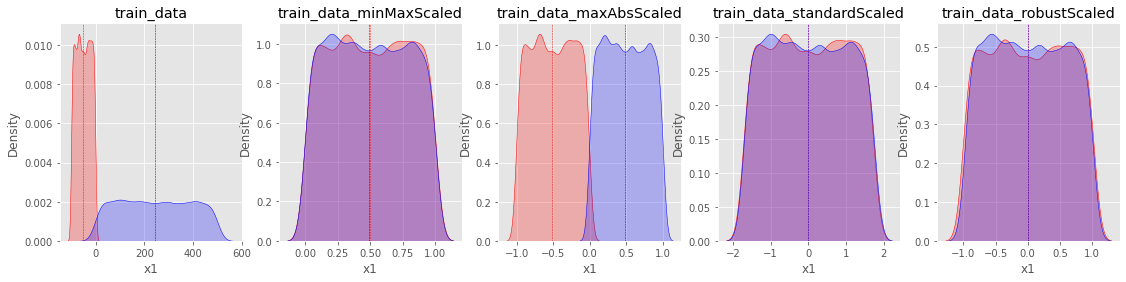

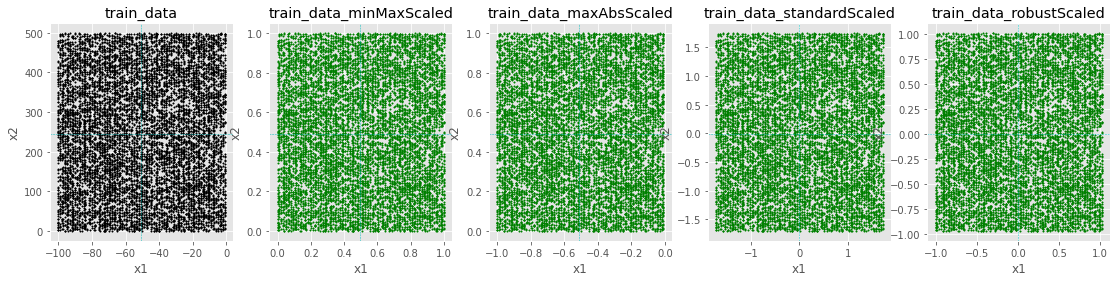

In [38]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)

In [39]:
train_data = pd.DataFrame({
    'x1': np.random.normal(-50, 10, 10000),
    'x2': np.random.normal(50, 50, 10000),
})

In [40]:
train_data.describe()

,x1,x2
count,10000.000000,10000.000000
mean,-49.871424,50.023553
std,10.060103,49.594207
min,-85.854554,-146.200898
25%,-56.682810,16.510939
50%,-49.919186,50.107204
75%,-43.184152,83.938270
max,-12.001252,263.532908


MinMaxScaler(copy=True, feature_range=(0, 1))
CPU times: user 3.46 ms, sys: 0 ns, total: 3.46 ms
Wall time: 3.56 ms
MaxAbsScaler(copy=True)
CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.56 ms
StandardScaler(copy=True, with_mean=True, with_std=True)
CPU times: user 1.54 ms, sys: 0 ns, total: 1.54 ms
Wall time: 1.52 ms
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
CPU times: user 3.62 ms, sys: 0 ns, total: 3.62 ms
Wall time: 3.48 ms


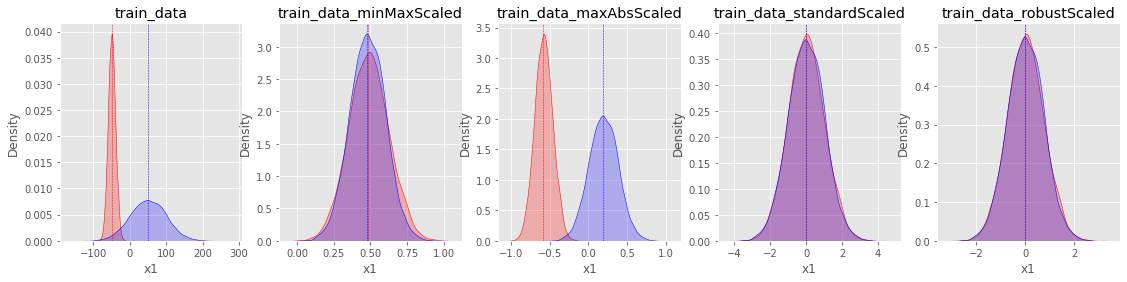

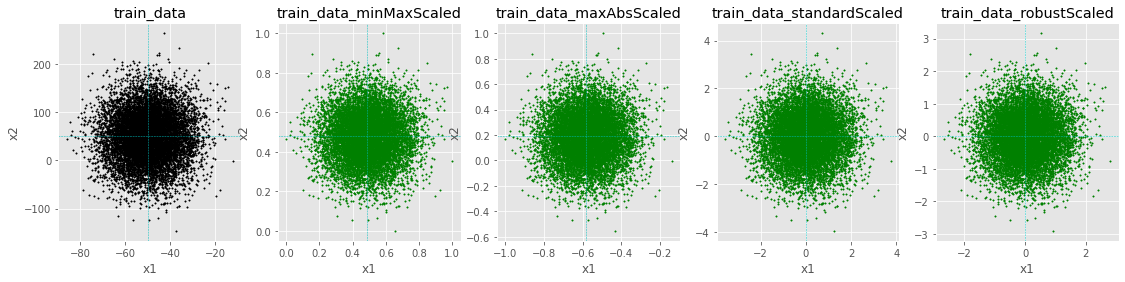

In [41]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)

In [42]:
train_data = pd.DataFrame({
    'x1': np.random.chisquare(5, 10000) - 20.0,
    'x2': (np.random.chisquare(10, 10000) * -1) + 20.0
})

MinMaxScaler(copy=True, feature_range=(0, 1))
CPU times: user 2.19 ms, sys: 148 µs, total: 2.34 ms
Wall time: 2.65 ms
MaxAbsScaler(copy=True)
CPU times: user 1.75 ms, sys: 91 µs, total: 1.84 ms
Wall time: 4.08 ms
StandardScaler(copy=True, with_mean=True, with_std=True)
CPU times: user 5.97 ms, sys: 0 ns, total: 5.97 ms
Wall time: 5.66 ms
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
CPU times: user 2.43 ms, sys: 0 ns, total: 2.43 ms
Wall time: 2.44 ms


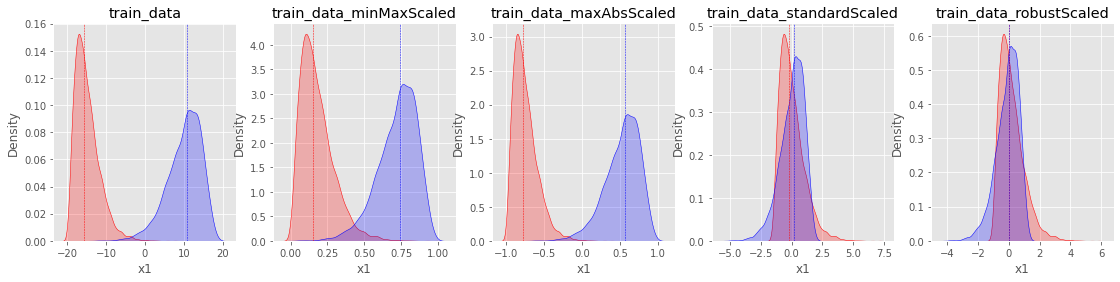

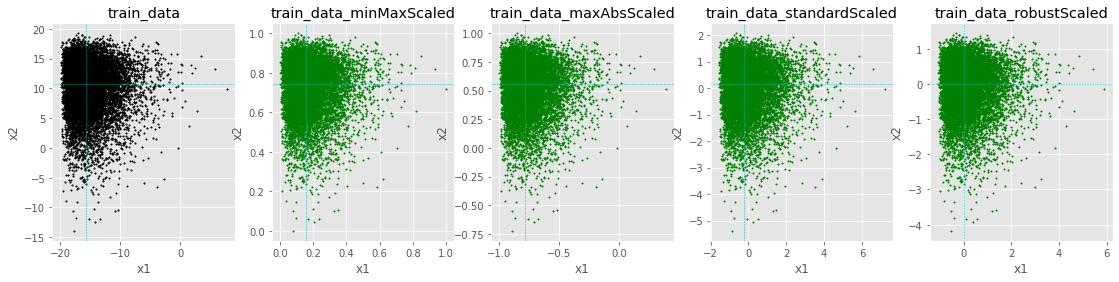

In [43]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)

In [44]:
train_data = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 1, 9000), np.random.normal(40, 1, 1000)]),
    'x2': np.concatenate([np.random.normal(30, 2, 9000), np.random.normal(10, 4, 1000)])
})

MinMaxScaler(copy=True, feature_range=(0, 1))
CPU times: user 2.1 ms, sys: 0 ns, total: 2.1 ms
Wall time: 2.09 ms
MaxAbsScaler(copy=True)
CPU times: user 2.09 ms, sys: 0 ns, total: 2.09 ms
Wall time: 1.83 ms
StandardScaler(copy=True, with_mean=True, with_std=True)
CPU times: user 4.37 ms, sys: 1.98 ms, total: 6.35 ms
Wall time: 6.62 ms
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
CPU times: user 3.45 ms, sys: 945 µs, total: 4.39 ms
Wall time: 3.74 ms


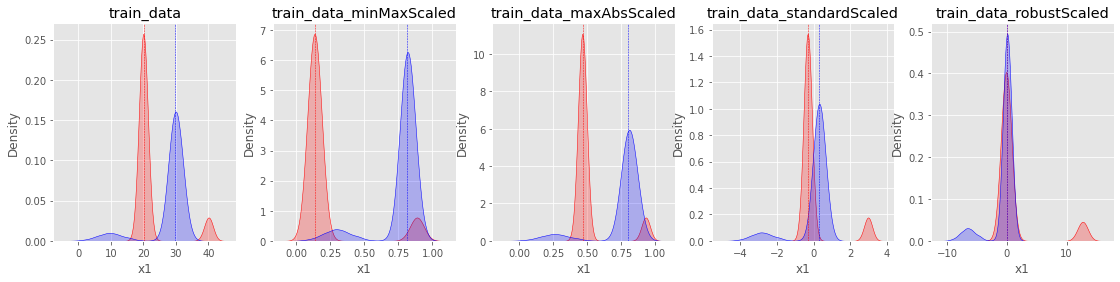

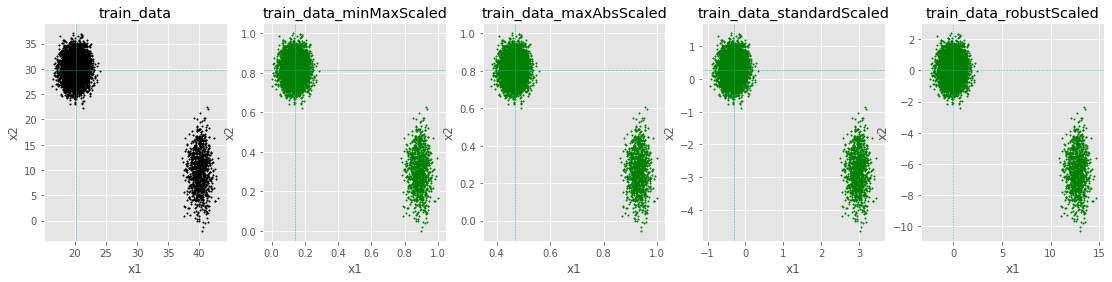

In [45]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)

In [46]:
train_data = pd.DataFrame({
    'x1': np.concatenate([np.array([0] * 100), np.array([0] * 100), np.array([1] * 600), np.array([1] * 200)]),
    'x2': np.concatenate([np.array([0] * 100), np.array([1] * 100), np.array([0] * 700), np.array([1] * 100)])
})

In [47]:
train_data.describe()

,x1,x2
count,1000.0000,1000.0000
mean,0.8000,0.2000
std,0.4002,0.4002
min,0.0000,0.0000
25%,1.0000,0.0000
50%,1.0000,0.0000
75%,1.0000,0.0000
max,1.0000,1.0000


MinMaxScaler(copy=True, feature_range=(0, 1))
CPU times: user 2.02 ms, sys: 0 ns, total: 2.02 ms
Wall time: 2.04 ms
MaxAbsScaler(copy=True)
CPU times: user 1.08 ms, sys: 1.05 ms, total: 2.13 ms
Wall time: 3.16 ms
StandardScaler(copy=True, with_mean=True, with_std=True)
CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.59 ms
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
CPU times: user 1.99 ms, sys: 0 ns, total: 1.99 ms
Wall time: 1.99 ms


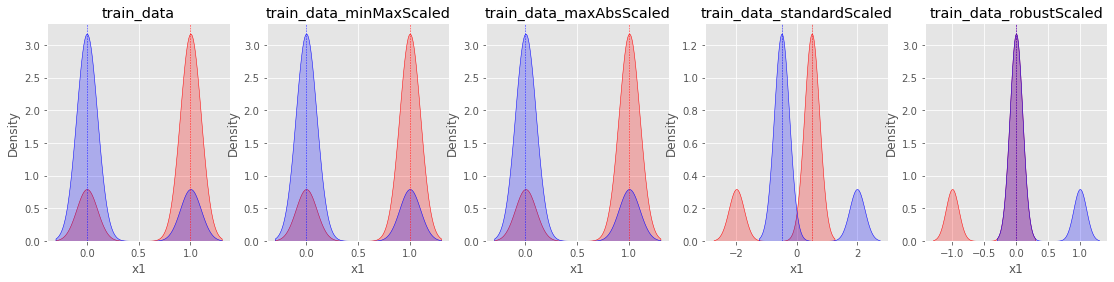

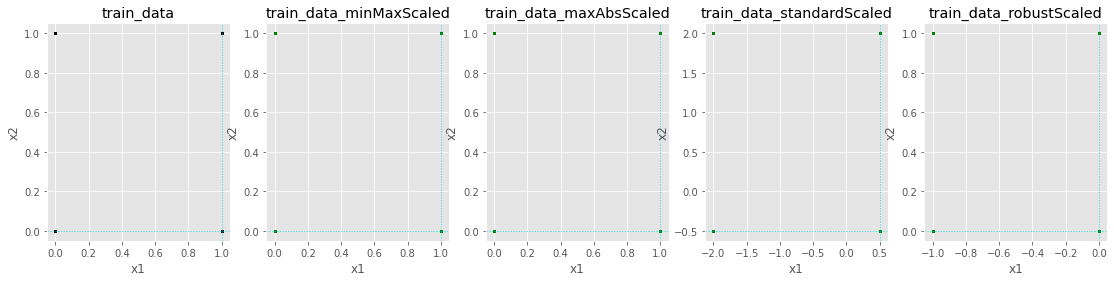

In [48]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)